In [421]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 
from scipy.stats import multivariate_normal


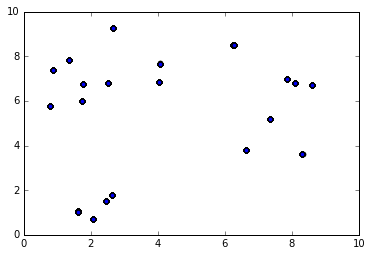

In [580]:
n_samples=500
N=20

#MM=[[10,-30],[3,-9],[-20,6],[30,20],[15,20],[0,20],[-20,-12],[30,1],[25,-15],[40,-30]]
#CC=np.r_[[[1,0],[0,1]],[[1,0],[0,1]], [[1,0],[0,1]],[[1,0],[0,1]],[[1,0],[0,1]],[[1,0],[0,1]],[[1,0],[0,1]]
        # ,[[1,0],[0,1]],[[1,0],[0,1]],[[1,0],[0,1]]]
    
MM=[[2.673, 9.249], [6.621, 3.819],[2.519, 6.794],[0.860, 7.400],[2.623, 1.803],[4.046, 6.832],
    [1.341, 7.840],[8.615,6.727],[7.866, 6.970],[2.055, 0.702],[6.259, 8.491],[1.607, 1.043],[8.318, 3.637],
    [0.789, 5.764],[4.054, 7.673], [1.745, 5.988],[8.091, 6.792],[1.759, 6.757],[2.451, 1.502],[7.351, 5.203]]  
CC=np.kron(np.ones((1,20)),[[1,0],[0,1]])

#for i in range(0,N):
    #CC[2*i:2*i+2,:]=1*np.dot(CC[2*i:2*i+2,:],CC[2*i:2*i+2,:].T)

#a=np.abs(np.random.randn(N))
#gamma=a/np.sum(a)
gamma=1/20*np.ones(20)


x=np.empty([0,2])
for i in range(0,N):
    #C=3*np.random.randn(2, 2)
    #C=np.dot(C,C.T)
    #M=5*np.random.randn(1, 2)
    #C=CC[2*i:2*i+2,:]
    C=[[.01,0],[0,.01]]
    M=MM[i]
    x=np.r_[x, gamma[i]* np.dot(np.random.randn(n_samples, 2), C) + M]  #

plt.scatter(x[:,0],x[:,1])


Xmin=min(x[:,0])
Xmax=max(x[:,0])
Ymin=min(x[:,1])
Ymax=max(x[:,1])

In [594]:
Xmin,Xmax,Ymin,Ymax=0,10,0,10  #-30,50,-30,30



In [581]:
def Calc_Likelihood(y,N):
    S=0
    for i in range(0,N):
        C=[[.01,0],[0,.01]]
        #CC[2*i:2*i+2,:]
        M=MM[i]
        S=S+ gamma[i]* multivariate_normal.pdf(y, mean=M, cov=C)
    return S

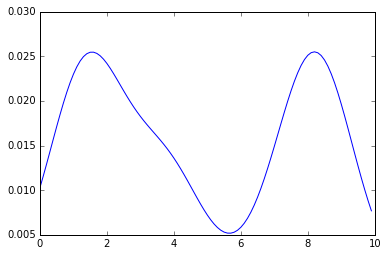

In [538]:
S=[]
for i in np.arange(0,10,.1):
    a=Calc_Likelihood([i,6],N)
    S.append(a)
plt.plot(np.arange(0,10,.1),S)

In [354]:
## MCMC

In [502]:
import random
def binary_to_int(X,L,Xmin,Xmax,Ymin,Ymax):
    a=''
    for i in range(0,L):
        a=a+str(int(X[i]))
    a=int(a, 2)
    a= Xmin + ((Xmax-Xmin)/(2**L-1)) *a 
    
    
    b=''
    for i in range(L,2*L):
        b=b+str(int(X[i]))
    b=int(b, 2)
    b= Ymin + ((Ymax-Ymin)/(2**L-1)) *b 
    return a,b

In [411]:
def mutate(X,L):
    Xm=X[:]
    import random
    bit=random.randint(0,2*L-1)  #***
    Xm[bit]=abs(1-Xm[bit])     #***
    
    #for bit in range(0,2*L):
        #if np.random.uniform()<0.5:
            #Xm[bit]=abs(1-Xm[bit])
    return Xm

0.70728


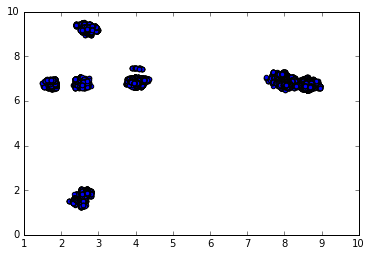

In [604]:
L=20
naccept = 0
niters=25000

SamplesX=[]
SamplesY=[]
X = [random.randint(0, 1) for i in range(2*L)]

for i in range(0,niters):
    X_decimal=binary_to_int(X,L,Xmin,Xmax,Ymin,Ymax)
    fx=Calc_Likelihood(X_decimal,N)
    
    Xm=mutate(copy.copy(X),L)
    Xm_decimal=binary_to_int(Xm,L,Xmin,Xmax,Ymin,Ymax)
    fy=Calc_Likelihood(Xm_decimal,N)
    #print(Xm_decimal)
    rho = min(1, fy/fx)
    u = np.random.uniform()
    
    if u < rho:
        naccept += 1
        X = Xm
        SamplesX.append(Xm_decimal[0])
        SamplesY.append(Xm_decimal[1])
    else:
        SamplesX.append(X_decimal[0])
        SamplesY.append(X_decimal[1])
    
print(naccept/niters)

plt.scatter(SamplesX[100:],SamplesY[100:])
#plt.scatter(x[:,0],x[:,1])
#plt.ylim(Ymin, 1.5*Ymax)
#plt.xlim(1.5*Xmin, 1.5*Xmax)

In [468]:
# Multiple chains

0.69872


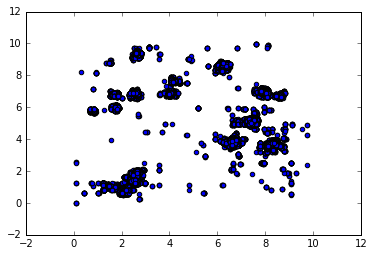

In [612]:
PopSize=50
NumGen=25000
SamplesX=[]
SamplesY=[]
Pop=np.empty([PopSize,2*L])
#Fitness=np.empty(PopSize)
naccept=0

for i in range(0,PopSize):
    Pop[i] =[random.randint(0, 1) for i in range(2*L)]
    #X_decimal=binary_to_int(Pop[i],L,Xmin,Xmax,Ymin,Ymax)
    #Fitness[i]=Calc_Likelihood(X_decimal)

for i in range(0,NumGen):
    index=random.randint(0,PopSize-1)
    
    X=Pop[index] 

    X_decimal=binary_to_int(X,L,Xmin,Xmax,Ymin,Ymax)
    fx=Calc_Likelihood(X_decimal,N)
    
    Xm=mutate(copy.copy(X),L)
    Xm_decimal=binary_to_int(Xm,L,Xmin,Xmax,Ymin,Ymax)
    fy=Calc_Likelihood(Xm_decimal,N)
    
    rho = min(1, fy/fx)
    u = np.random.uniform()
    
    if u < rho:
        naccept += 1
        Pop[index] = Xm 
        #Fitness[index]=fy
        SamplesX.append(Xm_decimal[0])
        SamplesY.append(Xm_decimal[1])
    else:

        SamplesX.append(X_decimal[0])
        SamplesY.append(X_decimal[1])

        
print(naccept/NumGen)

plt.scatter(SamplesX[100:],SamplesY[100:])

0.2434


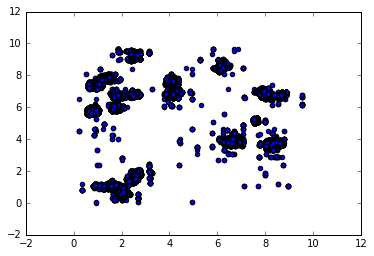

In [610]:
#E-MCMC

PopSize=50
NumGen=25000
SamplesX=[]
SamplesY=[]
Pop=np.empty([PopSize,2*L])
naccept=0

for i in range(0,PopSize):
    Pop[i] =[random.randint(0, 1) for i in range(2*L)]
    
    
for n in range(0,NumGen):
    
    # SELECT TWO PARENTS RANDOMLY
    
    index1=random.randint(0,PopSize-1)
    index2=random.randint(0,PopSize-1)
    
    Parent1=Pop[index1]
    Parent1_decimal=binary_to_int(Parent1,L,Xmin,Xmax,Ymin,Ymax)
    f_Parent1=Calc_Likelihood(Parent1_decimal,N) 
    
    Parent2=Pop[index2]
    Parent2_decimal=binary_to_int(Parent2,L,Xmin,Xmax,Ymin,Ymax)
    f_Parent2=Calc_Likelihood(Parent2_decimal,N)
    
    # Do Crossover & Mutation
    
    CrossPoint=random.choice(range(0,2*L))
    Child1=np.hstack([Parent1[0:CrossPoint],Parent2[CrossPoint:]])
    Child1=mutate(copy.copy(Child1),L)
    Child1_decimal=binary_to_int(Child1,L,Xmin,Xmax,Ymin,Ymax)
    f_Child1=Calc_Likelihood(Child1_decimal,N) 
    
    Child2=np.hstack([Parent2[0:CrossPoint],Parent1[CrossPoint:]])
    Child2=mutate(copy.copy(Child2),L)
    Child2_decimal=binary_to_int(Child2,L,Xmin,Xmax,Ymin,Ymax)
    f_Child2=Calc_Likelihood(Child2_decimal,N)
    
    fy=f_Child1 *  f_Child2
    fx=f_Parent1 * f_Parent2
    
    rho = min(1, fy/fx)
    u = np.random.uniform()
    
    if u < rho:  # replace parents with childs

        Pop[index1]=Child1
        Pop[index2]=Child2
        naccept += 1
        SamplesX.append(Child1_decimal[0])
        SamplesY.append(Child1_decimal[1])
        
        SamplesX.append(Child2_decimal[0])
        SamplesY.append(Child2_decimal[1])
        
    else:

        SamplesX.append(Parent1_decimal[0])
        SamplesY.append(Parent1_decimal[1])
        
        SamplesX.append(Parent2_decimal[0])
        SamplesY.append(Parent2_decimal[1])  


    
print(naccept/NumGen)
plt.scatter(SamplesX[100:],SamplesY[100:])   

In [ ]:
# Mixture

c:\users\mohammad\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:49: RuntimeWarning: invalid value encountered in double_scalars


0.61896


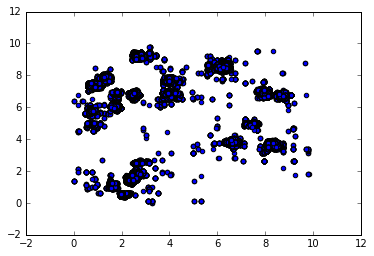

In [609]:
#E-MCMC

PopSize=50
NumGen=50000
SamplesX=[]
SamplesY=[]
Pop=np.empty([PopSize,2*L])
naccept=0
pm=2/3
pc=1/3

for i in range(0,PopSize):
    Pop[i] =[random.randint(0, 1) for i in range(2*L)]
    
    
for n in range(0,NumGen):
    
    # SELECT TWO PARENTS RANDOMLY
    
    if np.random.uniform()<pc:  # Do Crossover
    
        index1=random.randint(0,PopSize-1)
        index2=random.randint(0,PopSize-1)
    
        Parent1=Pop[index1]
        Parent1_decimal=binary_to_int(Parent1,L,Xmin,Xmax,Ymin,Ymax)
        f_Parent1=Calc_Likelihood(Parent1_decimal,N) 
    
        Parent2=Pop[index2]
        Parent2_decimal=binary_to_int(Parent2,L,Xmin,Xmax,Ymin,Ymax)
        f_Parent2=Calc_Likelihood(Parent2_decimal,N)
    
        #Child1=Parent1
        #Child2=Parent2
   
        CrossPoint=random.choice(range(0,2*L))
        Child1=np.hstack([Parent1[0:CrossPoint],Parent2[CrossPoint:]])
        Child2=np.hstack([Parent2[0:CrossPoint],Parent1[CrossPoint:]])
        
        Child1_decimal=binary_to_int(Child1,L,Xmin,Xmax,Ymin,Ymax)
        f_Child1=Calc_Likelihood(Child1_decimal,N)
        
        Child2_decimal=binary_to_int(Child2,L,Xmin,Xmax,Ymin,Ymax)
        f_Child2=Calc_Likelihood(Child2_decimal,N)
        
        fy=f_Child1 *  f_Child2
        fx=f_Parent1 * f_Parent2
        
        rho = min(1, fy/fx)
        u = np.random.uniform()
        
        if u < rho:  # replace parents with childs

            Pop[index1]=Child1
            Pop[index2]=Child2
            naccept += 1
            SamplesX.append(Child1_decimal[0])
            SamplesY.append(Child1_decimal[1])
        
            SamplesX.append(Child2_decimal[0])
            SamplesY.append(Child2_decimal[1])
        
        else:

            SamplesX.append(Parent1_decimal[0])
            SamplesY.append(Parent1_decimal[1])
        
            SamplesX.append(Parent2_decimal[0])
            SamplesY.append(Parent2_decimal[1])  

        
        
    if np.random.uniform()<pm:
        
        index=random.randint(0,PopSize-1)
        
        Parent=Pop[index]
        Parent_decimal=binary_to_int(Parent,L,Xmin,Xmax,Ymin,Ymax)
        f_Parent=Calc_Likelihood(Parent_decimal,N) 
        
        Child=mutate(copy.copy(Parent),L)
        Child_decimal=binary_to_int(Child,L,Xmin,Xmax,Ymin,Ymax)
        f_Child=Calc_Likelihood(Child_decimal,N)
             
        fy=f_Child
        fx=f_Parent
        
        rho = min(1, fy/fx)
        u = np.random.uniform()
        
        if u < rho:  # replace parents with childs

            Pop[index]=Child
            naccept += 1
            SamplesX.append(Child_decimal[0])
            SamplesY.append(Child_decimal[1])
   
        else:

            SamplesX.append(Parent_decimal[0])
            SamplesY.append(Parent_decimal[1])
    


    
print(naccept/NumGen)
plt.scatter(SamplesX[100:],SamplesY[100:])  

In [431]:
## XOR

In [459]:
def XorMutation(X,Y,Z):
    A = [int(y!=z) for (y, z) in zip(Y, Z)]
    B=  [int(x!=a) for (x, a) in zip(X, A)]
    return B

0.43124


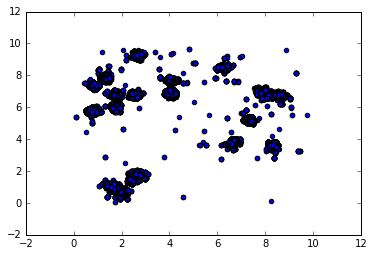

In [611]:
#E-MCMC xor

PopSize=50
NumGen=50000
SamplesX=[]
SamplesY=[]
Pop=np.empty([PopSize,2*L])
naccept=0
pm=1/2
pc=1/2

for i in range(0,PopSize):
    Pop[i] =[random.randint(0, 1) for i in range(2*L)]
    
    
for n in range(0,NumGen):
    
    # SELECT TWO PARENTS RANDOMLY
    
    if np.random.uniform()<pc:  # Do Crossover
    
        index1=random.randint(0,PopSize-1)
        index2=random.randint(0,PopSize-1)
        index3=random.randint(0,PopSize-1)
        
        Parent1=Pop[index1]
        Parent2=Pop[index2]
        Parent3=Pop[index3]
        
        Parent1_decimal=binary_to_int(Parent1,L,Xmin,Xmax,Ymin,Ymax)
        f_Parent1=Calc_Likelihood(Parent1_decimal,N) 
    
        Child1=XorMutation(Parent1,Parent2,Parent3)    
        Child1_decimal=binary_to_int(Child1,L,Xmin,Xmax,Ymin,Ymax)
        f_Child1=Calc_Likelihood(Child1_decimal,N)
        
        
        fy=f_Child1
        fx=f_Parent1
        
        rho = min(1, fy/fx)
        u = np.random.uniform()
        
        if u < rho:  # replace parents with childs

            Pop[index1]=Child1
            naccept += 1
            SamplesX.append(Child1_decimal[0])
            SamplesY.append(Child1_decimal[1])
   
        else:

            SamplesX.append(Parent1_decimal[0])
            SamplesY.append(Parent1_decimal[1])
          

        
        
    if np.random.uniform()<pm:
        
        index=random.randint(0,PopSize-1)
        
        Parent=Pop[index]
        Parent_decimal=binary_to_int(Parent,L,Xmin,Xmax,Ymin,Ymax)
        f_Parent=Calc_Likelihood(Parent_decimal,N) 
        
        Child=mutate(copy.copy(Parent),L)
        Child_decimal=binary_to_int(Child,L,Xmin,Xmax,Ymin,Ymax)
        f_Child=Calc_Likelihood(Child_decimal,N)
             
        fy=f_Child
        fx=f_Parent
        
        rho = min(1, fy/fx)
        u = np.random.uniform()
        
        if u < rho:  # replace parents with childs

            Pop[index]=Child
            naccept += 1
            SamplesX.append(Child_decimal[0])
            SamplesY.append(Child_decimal[1])
   
        else:

            SamplesX.append(Parent_decimal[0])
            SamplesY.append(Parent_decimal[1])
    


    
print(naccept/NumGen)
plt.scatter(SamplesX[100:],SamplesY[100:]) 